# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Challenge 1

#### The data we will use in this challenge is:

In [3]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

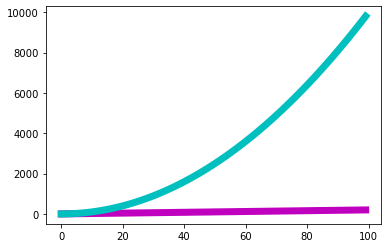

In [22]:
fig_1, ax_1 = plt.subplots()
ax_1.plot(x,y, label="y", c = "m", linewidth=7.0) 
ax_1.plot(x,z, label="z", c = "c", linewidth=7.0)

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

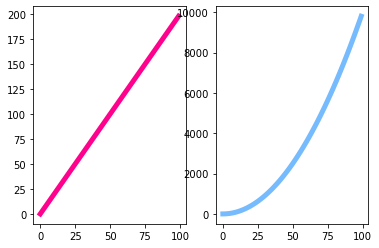

In [32]:
fig_2, ax_2 = plt.subplots(1,2)
ax_2[0].plot(x,y, label="y", c = "xkcd:hot pink", linewidth=5.0) 
ax_2[1].plot(x,z, label="z", c = "xkcd:sky blue", linewidth=5.0)

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

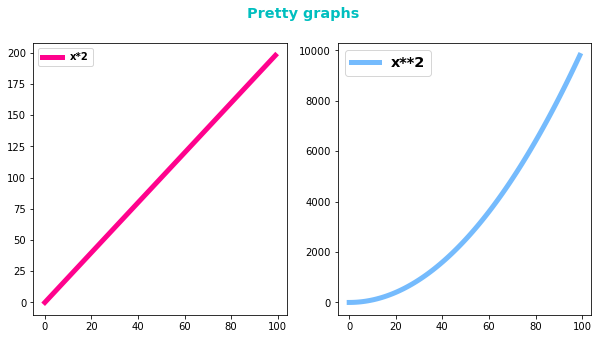

In [91]:
fig_3, ax_3 = plt.subplots(1,2)
ax_3[0].plot(x,y, label="x*2", c = "xkcd:hot pink", linewidth=5.0) 
ax_3[1].plot(x,z, label="x**2", c = "xkcd:sky blue", linewidth=5.0)

# added title + titlestyle
fig_3.suptitle("Pretty graphs", color='c', fontsize='x-large', fontweight = 'bold')

# added legend
ax_3[0].legend()
ax_3[1].legend()

# legend properties
style_1 = {'weight':'bold'}
style_2 = {'size':'x-large', 'weight':'bold'}
ax_3[0].legend(prop=style_1)
ax_3[1].legend(prop=style_2)

#figuresize
fig_3.set_figheight(5)
fig_3.set_figwidth(10)

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

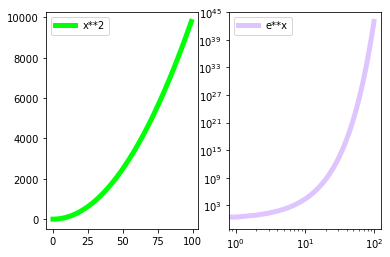

In [77]:
y1= x**2
y2= np.exp(x)

#y2 = e**x
#log(y2)= x

# plot

fig_4, ax_4 = plt.subplots(1,2)
ax_4[0].plot(x,y1, label="x**2", c = "xkcd:bright green", linewidth=5.0) 
ax_4[1].plot(x,y2, label="e**x", c = "xkcd:light lavender", linewidth=5.0)

#logarithmic scale for second plot
ax_4[1].set_yscale('log')
ax_4[1].set_xscale('log')

#legend
ax_4[0].legend()
ax_4[1].legend()

#### As a bonus challenge, try to add a legend to the plot.

In [ ]:
# see above

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [75]:
path = '../Datasets as CSV/Fitbit2.csv'
fitbit = pd.read_csv(path)

In [76]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

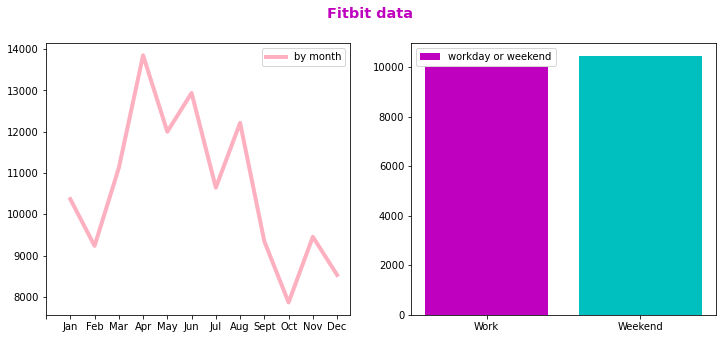

In [148]:
steps_by_month = fitbit.groupby('Months_encoded')['Steps'].median()
steps_by_day = fitbit.groupby('Work_or_Weekend')['Steps'].median()
months = ['','Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
week_work = ['Work', 'Weekend']

#plot
fig_5, ax_5 = plt.subplots(1, 2)

# MEDIAN STEPS BY MONTH_ENCODED
plt.sca(ax_5[0])
ax_5[0].plot(steps_by_month.index, steps_by_month, label="by month", c = "xkcd:soft pink", linewidth=4.0) 
plt.xticks(range(13),months)

# MEDIAN STEPS BY WORK_OR_WEEKEND
plt.sca(ax_5[1])
ax_5[1].bar(x = steps_by_day.index, height = steps_by_day, label="workday or weekend", color = ['m', 'c'])
plt.xticks(range(2),week_work)

# Title
fig_5.suptitle("Fitbit data", color='m', fontsize='x-large', fontweight = 'bold') 

#legend
ax_5[0].legend()
ax_5[1].legend()

#Size
fig_5.set_figheight(5)
fig_5.set_figwidth(12)

In [273]:
fig_5.savefig('../figures/fitbit_data_1.png')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

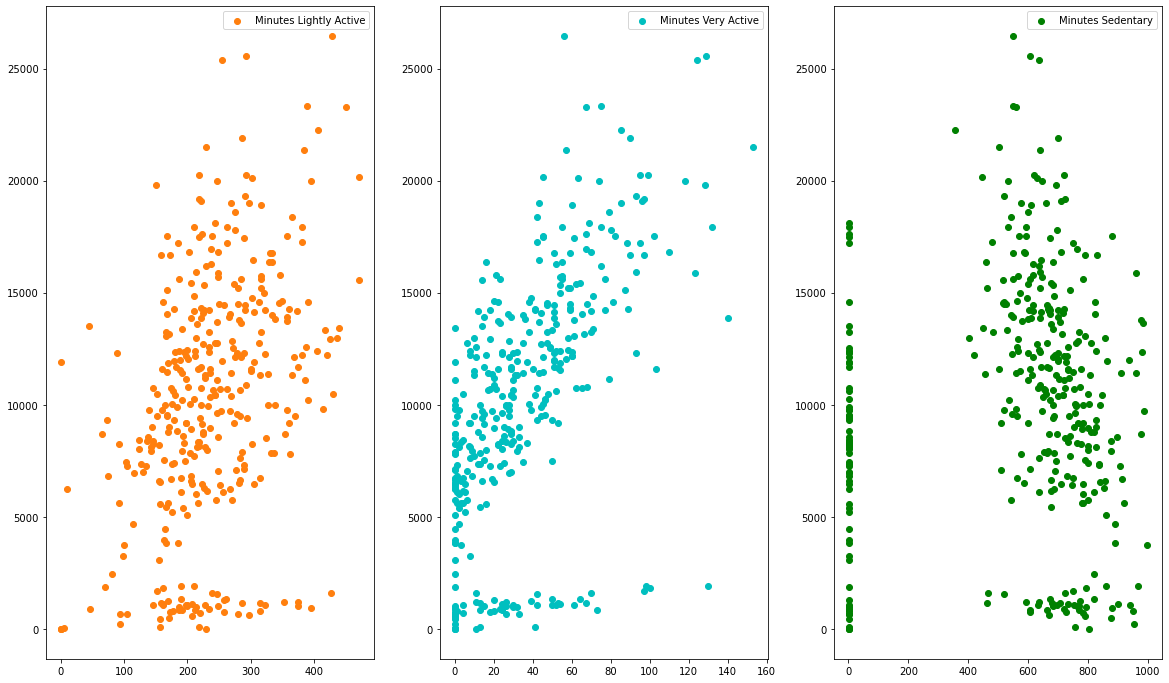

In [160]:
columns = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']
colors =['#ff7f0e', 'c', 'g']

#plot
fig_6, ax_6 = plt.subplots(1, 3, figsize = (20,12))

#with for loop
for n, elem in enumerate(columns): 
    ax_6[n].scatter(fitbit[elem], fitbit['Steps'], label = elem, c =colors[n])
    ax_6[n].legend()


In [274]:
fig_6.savefig('../figures/fitbit_data_2.png')

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [161]:
path_2 = '../Datasets as CSV/titanic.csv'
titanic = pd.read_csv(path_2)

In [163]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [166]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [ ]:
# NUMERICAL VARIABLES

In [167]:
titanic.select_dtypes(['int64', 'float64'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [168]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(['object'])

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [172]:
plt.style.use('classic')   
plt.rcParams['figure.figsize']=[12,6]

#same for seaborn sns
sns.set_style('darkgrid')   

#### Use the right visulalization to show the distribution of column `Age`.

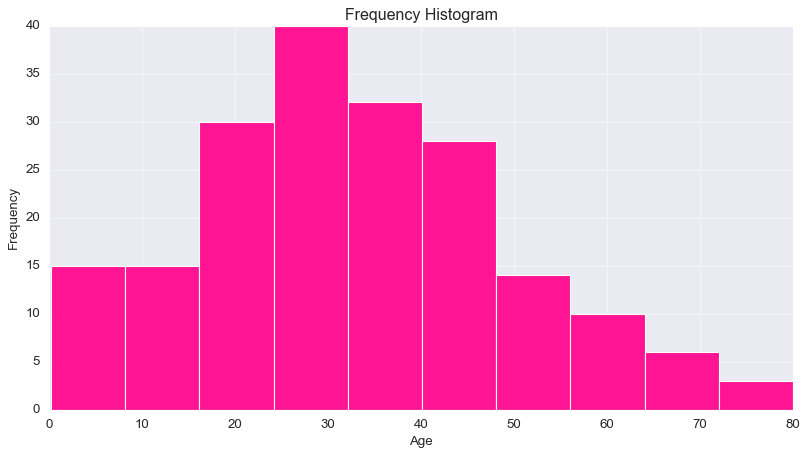

In [229]:
age = titanic.groupby('Age')['Age'].count()

#plot
fig_7, ax_7 = plt.subplots()
# ax_7.bar(age.index,age, label="Age", color = '#ff7f0e') 
ax_7.hist(age.index,color="deeppink")
plt.gca().set(title='Frequency Histogram', ylabel='Frequency', xlabel='Age')

plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

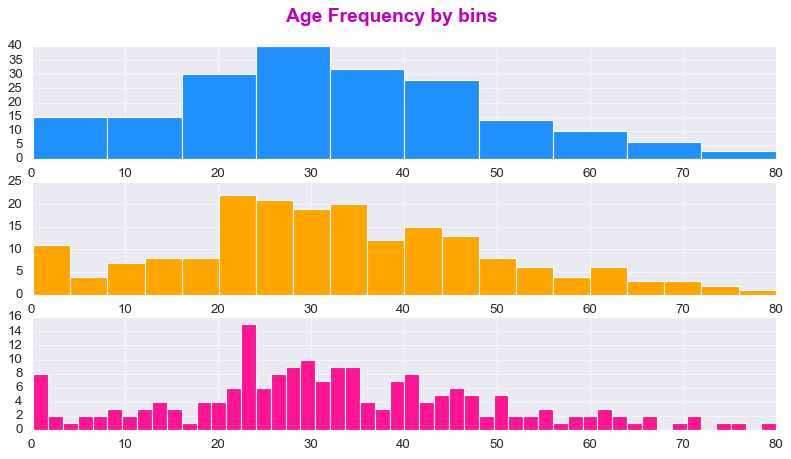

In [228]:
#plot
fig_8, ax_8 = plt.subplots(3,1)

ax_8[0].hist(age.index,bins=10 ,color="dodgerblue")
ax_8[1].hist(age.index,bins=20 ,color="orange")
ax_8[2].hist(age.index,bins=50 ,color="deeppink")

# Title
fig_8.suptitle("Age Frequency by bins", color='m', fontsize='x-large', fontweight = 'bold') 

plt.show()

#### How does the bin size affect your plot?

In [ ]:
"""
More bins are more accurate and more visual.
"""

#### Use seaborn to show the distribution of column `Age`.

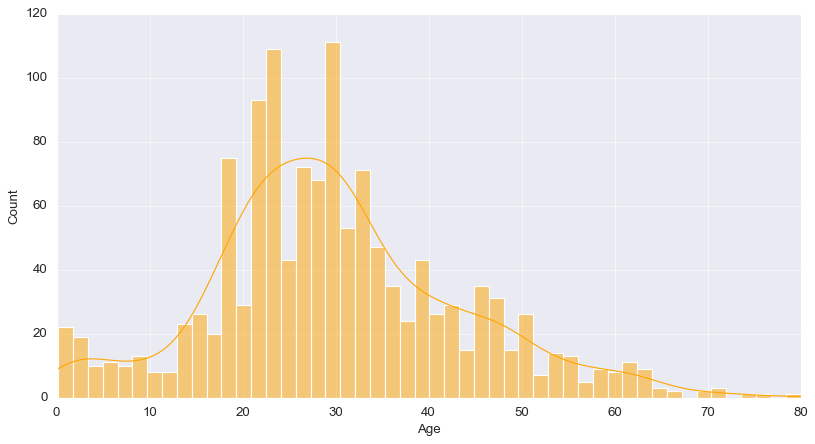

In [227]:
sns.histplot(data=titanic, x='Age', bins=50, color ='orange',kde=True)
plt.show()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [215]:
titanic['Gender'].value_counts()

male      843
female    466
Name: Gender, dtype: int64

In [216]:
gender = titanic['Gender'].value_counts()

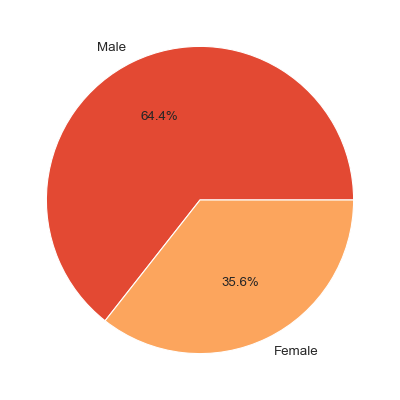

In [226]:
# Method 1 - matplotlib
genders = ['Male', 'Female']
plt.pie(gender, labels=genders, autopct='%1.1f%%')
plt.show()

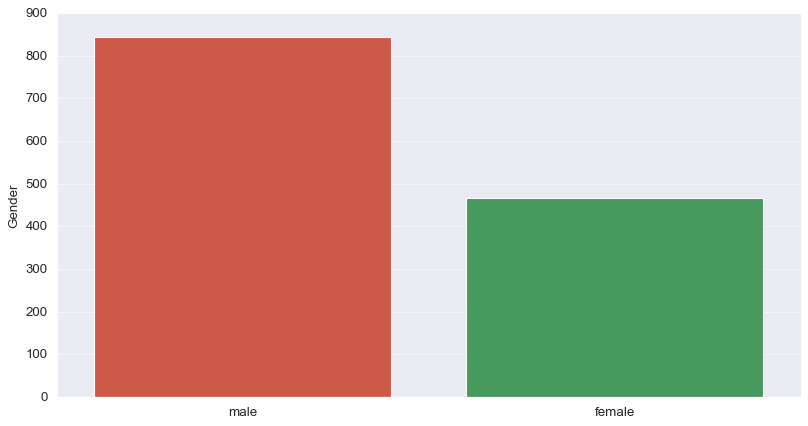

In [231]:
#color settings
sns.set_palette('RdYlGn')
palette_gender = {"female": "C5", "male": "C0"}

# Method 2 - seaborn
sns.barplot(x=gender.index ,y =gender, palette= palette_gender)
plt.show()

#### Use the right plot to visualize the column `Pclass`.

In [234]:
titanic['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

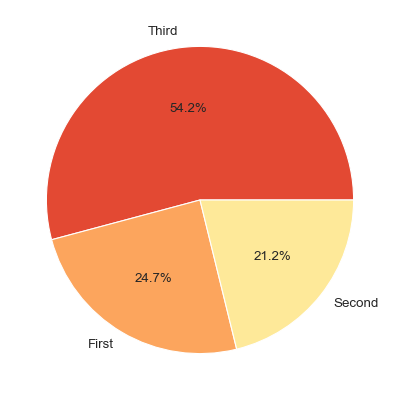

In [235]:
Pclass = titanic['Pclass'].value_counts()
class_labels = ['Third', 'First','Second']
plt.pie(Pclass, labels=class_labels, autopct='%1.1f%%')
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

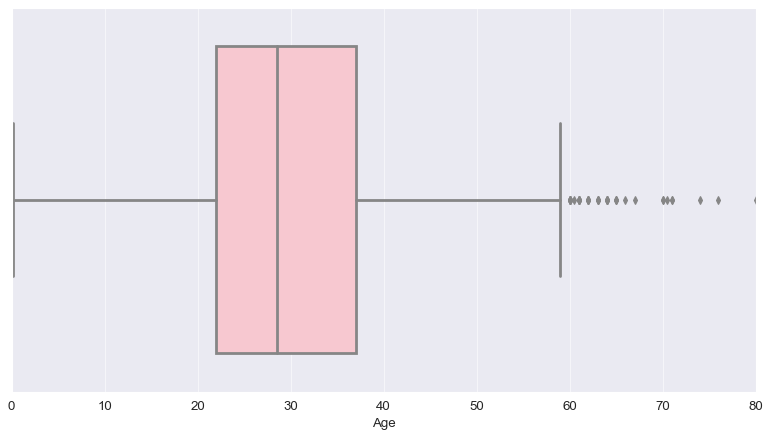

In [244]:
# your code here interquantile ranges, boxplot
sns.boxplot(x='Age', data = titanic, color='pink', linewidth=2.5)  # or x=titanic['Age']
plt.show()

In [ ]:
"""
We used boxplot to see the main distribution of the age as well as the outliers. 
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
The average age is around 30, with some outliers between 60 and 80.
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

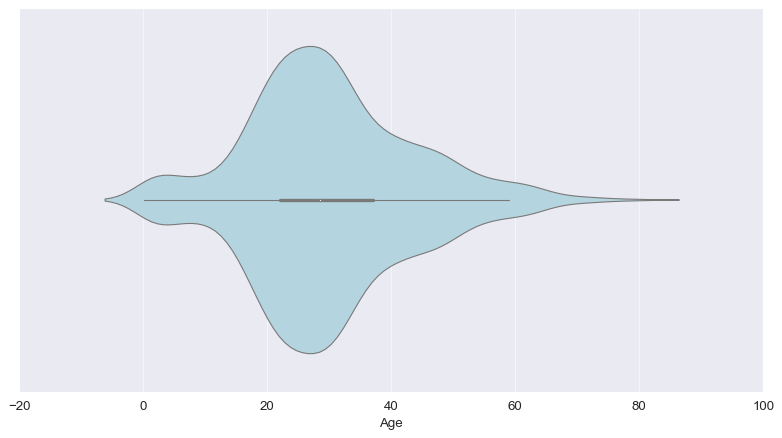

In [247]:
sns.violinplot(x='Age', data = titanic, color='lightblue')
plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
The peaks, valleys, and tails of each group’s density curve can be compared to see,
where groups are similar or different. so we get a better understanding of the distribution instead of the box in boxplot.
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

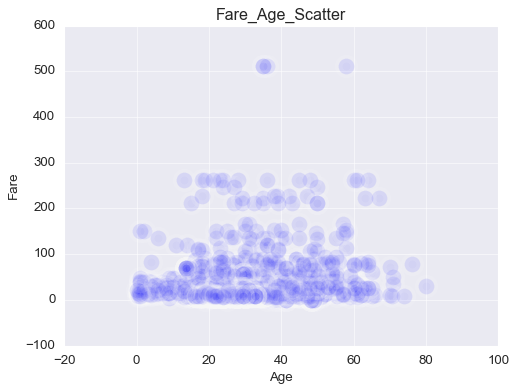

In [324]:
# Method 1 - matplotlib scatterplot

fig_10, ax_10 = plt.subplots(figsize = (7,5))
ax_10.scatter(titanic['Age'],titanic['Fare'], linewidth=7.0, c='b', alpha=0.1, s=200) 

# Title/y-x axis name
plt.gca().set(title='Fare_Age_Scatter', ylabel='Fare', xlabel='Age')

plt.show()

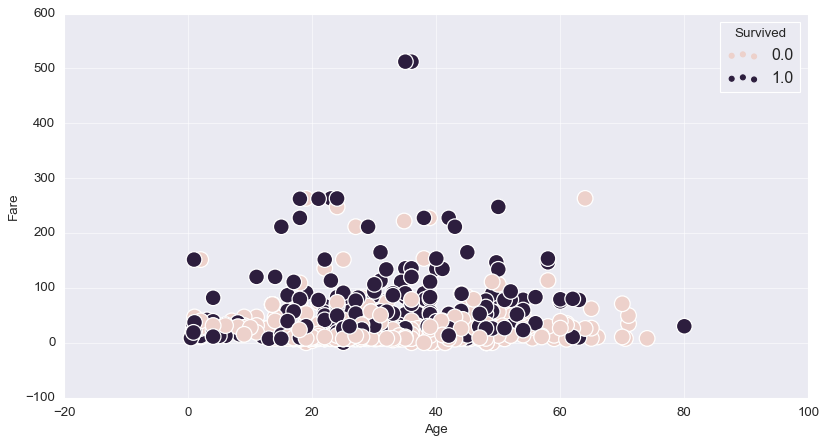

In [308]:
# Method 2 seaborn
sns.scatterplot(data=titanic, x="Age", y="Fare", hue= 'Survived',s=200)
plt.show()


#### Plot the correlation matrix using seaborn.

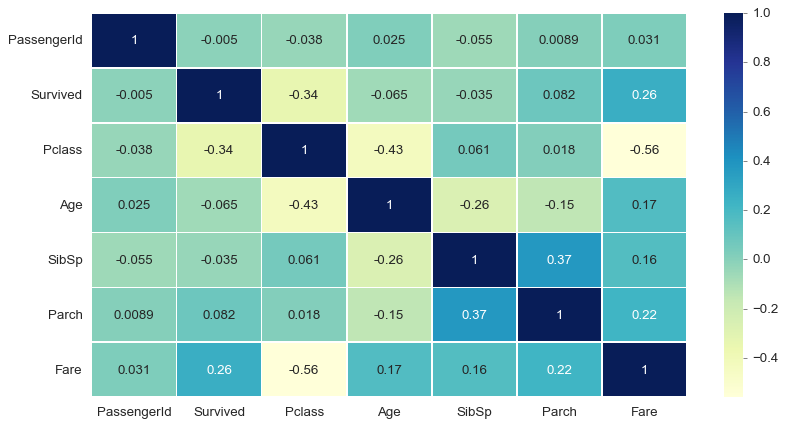

In [262]:
heatmap = titanic.select_dtypes(['int64', 'float64']) # only numerical

sns.heatmap(heatmap.corr(),annot=True, cmap="YlGnBu", linewidths=.5)
plt.show()

#### What are the most correlated features?

In [ ]:
"""
your comments here really dark or really light have a high correlation
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

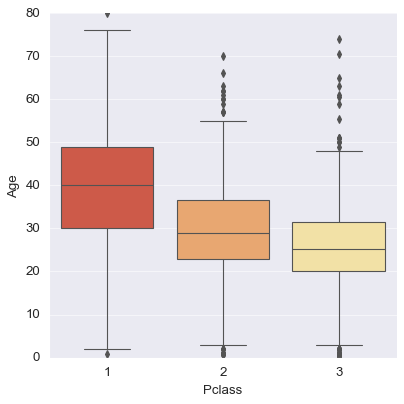

In [269]:
sns.catplot(x='Pclass', y='Age', data = titanic, kind= "box")
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

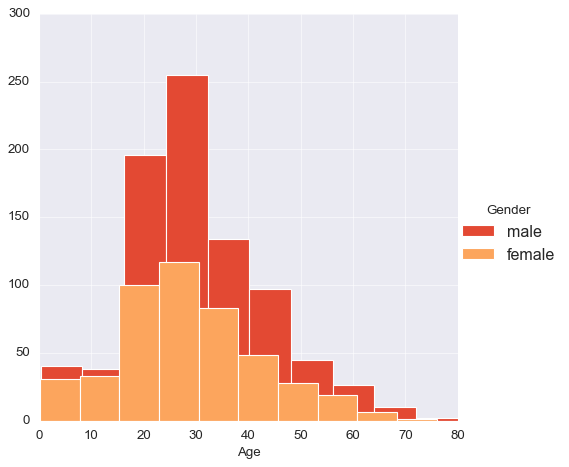

In [271]:
sns.FacetGrid(data=titanic, hue= 'Gender', height = 6).map(plt.hist,'Age').add_legend()
plt.show()